In [ ]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "7" # NOTE: use this to select GPU
import torch
from timm.models import create_model

import model.conv_segmenter
import model.mamba_segmenter
import utils as utils
from ref_dataset import get_transform_seg


DEVICE = torch.device("cuda")
SEED = 42
MODEL_NAME = "ReMamber_Mamba" # "ReMamber_Mamba" or "ReMamber_Conv"
CKPT_PATH = "checkpoints/ReMamber_Mamba.pth"

# prepare model and transforms
demo_model, new_param = create_model(
    MODEL_NAME,
    img_size=480,
    model_size="base",
)

checkpoint = torch.load(CKPT_PATH, map_location='cpu')
demo_model.load_state_dict(checkpoint['model'])
demo_model.to(DEVICE)
demo_model.eval()
transforms = get_transform_seg(size=(480,480), train=False)

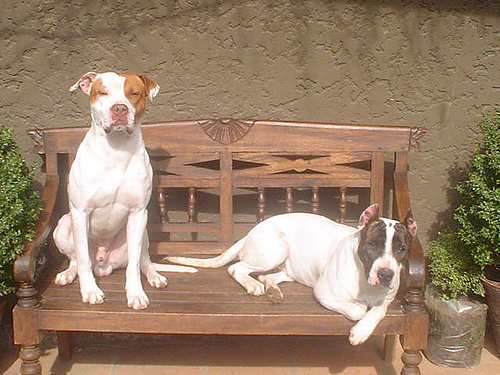

In [2]:
# read the image
from PIL import Image
input_img = Image.open("assets/demo_image.jpg")
input_img

In [3]:
# image transform and model inference
img = transforms(input_img, torch.zeros(1,480,480))[0].unsqueeze(0).to(DEVICE)
txt = "The right dog"
output = demo_model(img, [txt])
output.shape

torch.Size([1, 1, 480, 480])

output.shape

Input text: The right dog


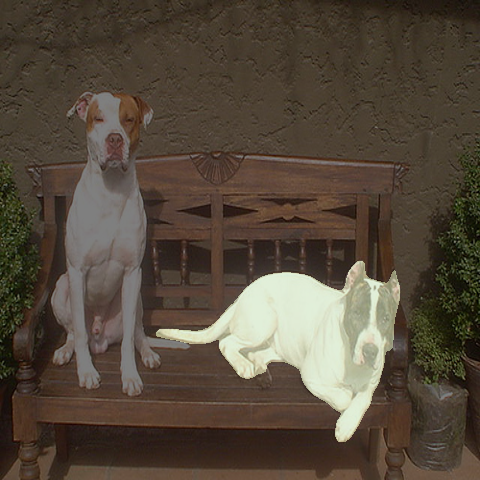

In [4]:
# show result
pred = (output.sigmoid().cpu().detach().squeeze() > 0.5).unsqueeze(-1)
color = torch.tensor([197,224,180]).unsqueeze(0)
pred_mask = Image.fromarray((pred*color).numpy().astype('uint8'))
print("Input text:", txt)
Image.blend(input_img.resize((480,480)), pred_mask, alpha=0.5)